In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

import pandas as pd

# Define the data
data_table_4 = {
    'Observation': list(range(1, 31)),
    'X1': [
        0.03, 0.02, 0.19, 0.00, 0.01, 0.10, 0.30, 0.31, 0.19, 0.00, 
        0.37, 0.31, 0.00, 0.59, 0.15, 0.03, 0.01, 0.31, 0.30, 0.00, 
        0.08, 0.30, 0.60, 0.00, 0.56, 0.14, 0.28, 1.38, 0.09, 0.14
    ],
    'X2': [
        10.04, 10.90, 8.87, 8.86, 8.76, 10.77, 10.51, 10.51, 10.62, 10.28, 
        9.43, 10.60, 9.35, 11.48, 10.21, 10.03, 10.04, 9.74, 8.43, 10.10, 
        10.91, 12.73, 10.39, 10.20, 9.04, 8.01, 9.01, 9.97, 10.30, 9.74
    ]
}

# Create the DataFrame
data = pd.DataFrame(data_table_4)

# Display the DataFrame
data.head()


,Observation,X1,X2
0,1,0.03,10.04
1,2,0.02,10.90
2,3,0.19,8.87
3,4,0.00,8.86
4,5,0.01,8.76


In [5]:
data.drop(columns=['Observation'], inplace=True)

Number of points n = 30
Mean = 0.23


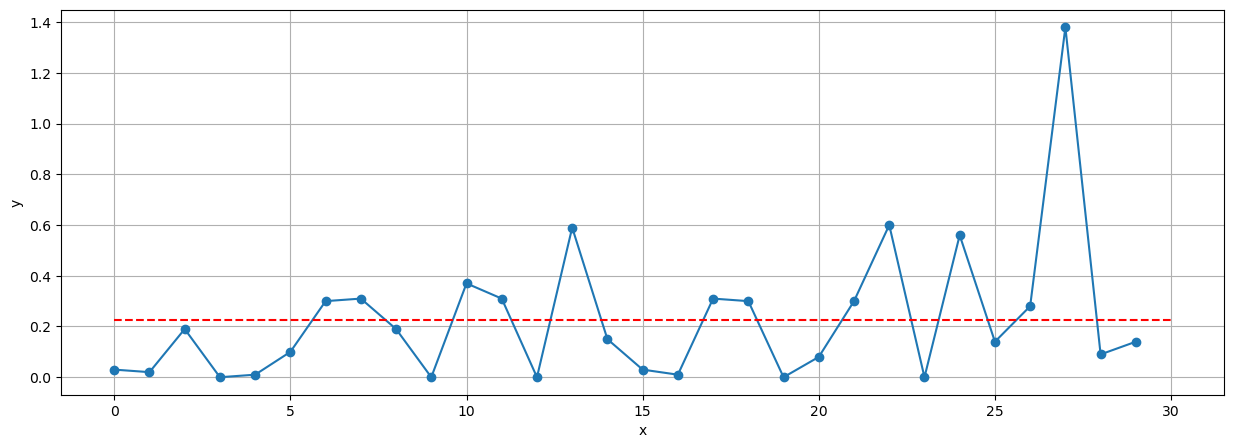

Number of points n = 30
Mean = 9.99


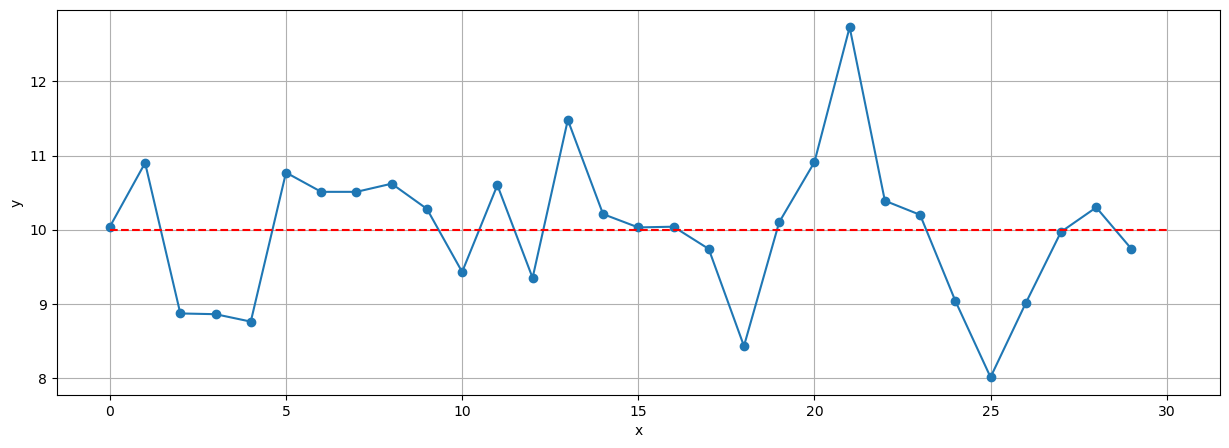

Runs test statistic = -0.155
Runs test p-value = 0.87677
Accept H0: the data are random
Runs test statistic = -1.318
Runs test p-value = 0.18747
Accept H0: the data are random
p-value of the Shapiro-Wilk test: 0.00000
Reject H0: the data are not normal
p-value of the Shapiro-Wilk test: 0.37045


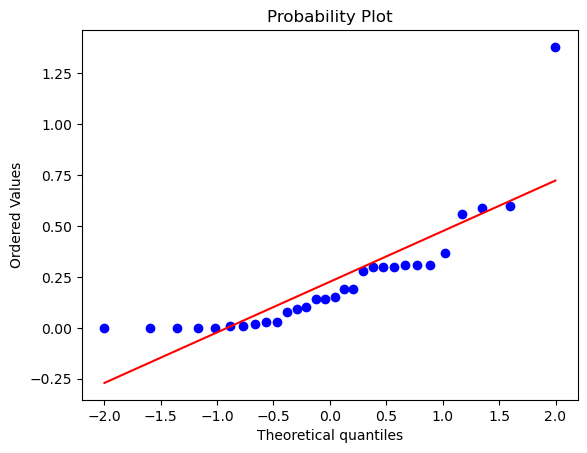

Accept H0: the data are normal


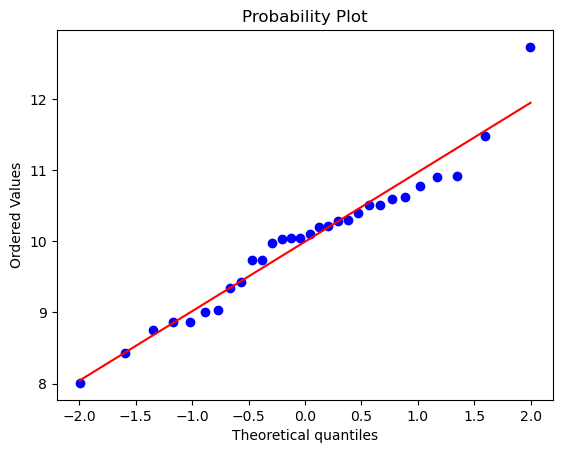

In [6]:
mf.single_ts_plot(data['X1'])
mf.single_ts_plot(data['X2'])
mf.runs(data['X1'])
mf.runs(data['X2'])
mf.shapiroqq(data['X1'])
mf.shapiroqq(data['X2'])

p-value of the Shapiro-Wilk test: 0.06088
Accept H0: the data are normal


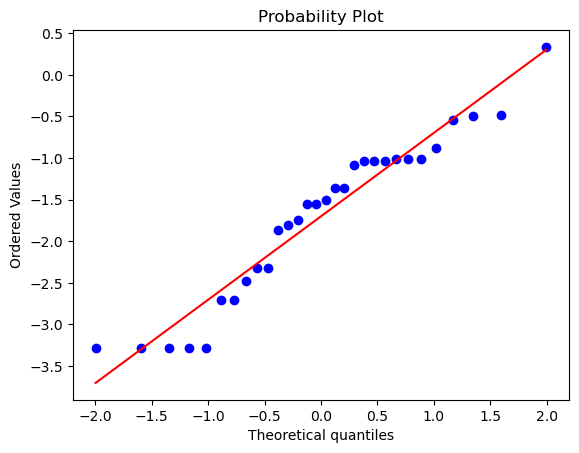

In [28]:
data['X1_plus']=data['X1']+1e-3
data['X1_norm']=stats.boxcox(data['X1_plus'], lmbda=0.25)
mf.shapiroqq(data['X1_norm'])

In [21]:
data_to_use=pd.DataFrame({'X1': data['X1_norm']})
data_to_use['X2']=data['X2']

In [22]:
Xbar = data_to_use.mean()

In [23]:
S1 = data_to_use.cov() #il long range estimator è la semplice cov matrix 😊
print("The long range estimator is: \n", S1)


The long range estimator is: 
           X1        X2
X1  0.986416  0.117108
X2  0.117108  0.926929


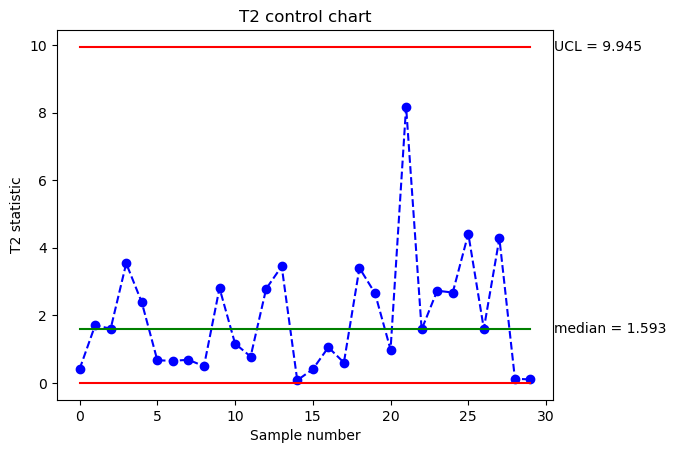

In [24]:
[UCL,data_CC]=mf.T2cc_n_1(2,len(data_to_use),0.0027,data_to_use,Xbar,S1)

The short range estimator is: 
           X1        X2
X1  1.077926  0.074744
X2  0.074744  0.651172


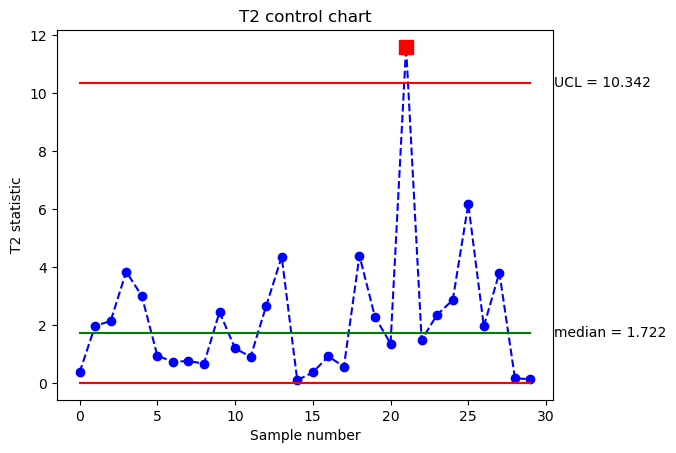

In [12]:
V = data_to_use.diff().dropna() #matrice (m-1)x(p)

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (len(data_to_use)-1) #Short range estimator

# Display the short range estimator
print("The short range estimator is: \n", S2)

[UCL_2,data_CC_2]=mf.T2cc_n_1(2,len(data_to_use),0.002,data_to_use,Xbar,S2)


The short range estimator is: 
           X1        X2
X1  1.061133  0.071532
X2  0.071532  0.499655


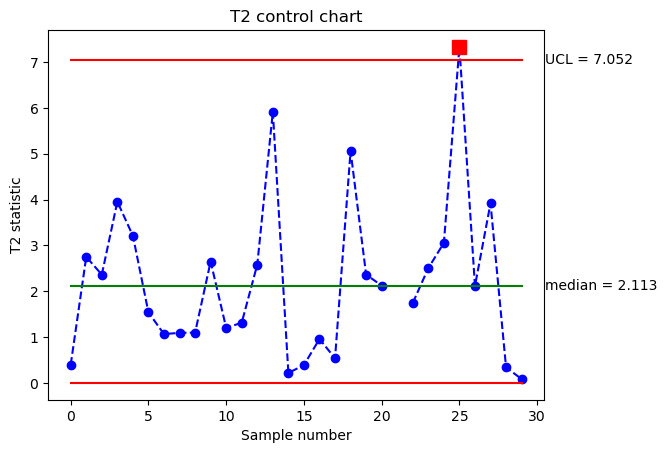

In [13]:
#assumendo assignable cause va rimosso il dato e rifatto tutto:
data_to_use.iloc[21,:]=np.nan

Xbar = data_to_use.mean()
V = data_to_use.diff().dropna() #matrice (m-1)x(p)

# Calculate the short range estimator S2
S2 = 1/2 * V.transpose().dot(V) / (len(data_to_use)-1) #Short range estimator

# Display the short range estimator
print("The short range estimator is: \n", S2)

[UCL_2,data_CC_2]=mf.T2cc_n_1(2,len(data_to_use),0.02,data_to_use,Xbar,S2)

In [14]:
data_table_5 = {
    'X1': [0.18, 0.03, 0.08, 0.27, 0.31, 0.40, 0.11, 0.00, 0.01, 0.01],
    'X2': [12.37, 12.30, 12.01, 11.87, 12.50, 11.72, 12.63, 12.21, 11.33, 12.79]
}

# Create the DataFrame
new_data = pd.DataFrame(data_table_5)

# Display the DataFrame
print(new_data)

     X1     X2
0  0.18  12.37
1  0.03  12.30
2  0.08  12.01
3  0.27  11.87
4  0.31  12.50
5  0.40  11.72
6  0.11  12.63
7  0.00  12.21
8  0.01  11.33
9  0.01  12.79


In [15]:
new_data['X1_plus']=data['X1']+1e-3
new_data['X1_norm']=new_data['X1_plus'].transform(lambda x: ((x**lmbda)))
data_to_use_2=pd.DataFrame({'X1': new_data['X1_norm']})
data_to_use_2['X2']=new_data['X2']

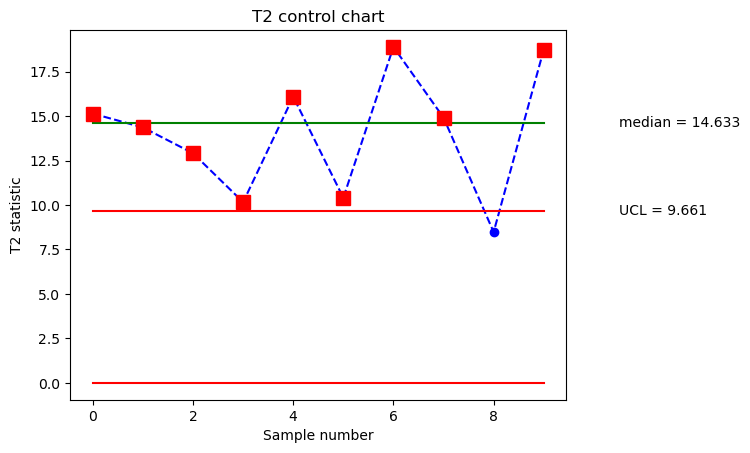

In [16]:
new_data['X1_plus']=data['X1']+1e-3
new_data['X1_norm']=new_data['X1_plus'].transform(lambda x: ((x**lmbda)))
data_to_use_2=pd.DataFrame({'X1': new_data['X1_norm']})
data_to_use_2['X2']=new_data['X2']
m=30
m_ph2=10
alpha=0.02
p=2
[UCL_ph2,data_CC_ph2]=mf.T2cc_n_1_ph2(p,m,m_ph2,alpha,data_to_use_2,Xbar,S2)